# Assignment - 2

## Physical Data Model and Normalization

This assignemnt consists of data from a toy-store where in the obtained datasheet contains details regarding customer, product and it's sale. The tables are created and modulated as per requirement.
The normalization forms for the table would later be justified along with the solution.

### Imports

In [1]:
import numpy as np
import pandas as pd
import json
import os
import csv
from collections import OrderedDict
from io import StringIO

### Reading the data from the CSV file obtained

In [2]:
# Reading the data from the CSV file obtained

with open('sales_data_sample2.csv') as f:
    data = f.read()

data = StringIO(data)
data = pd.read_csv(data)

# Creating and viewing master table/datasheet

data


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## Entity Relationship Diagram (ERD)

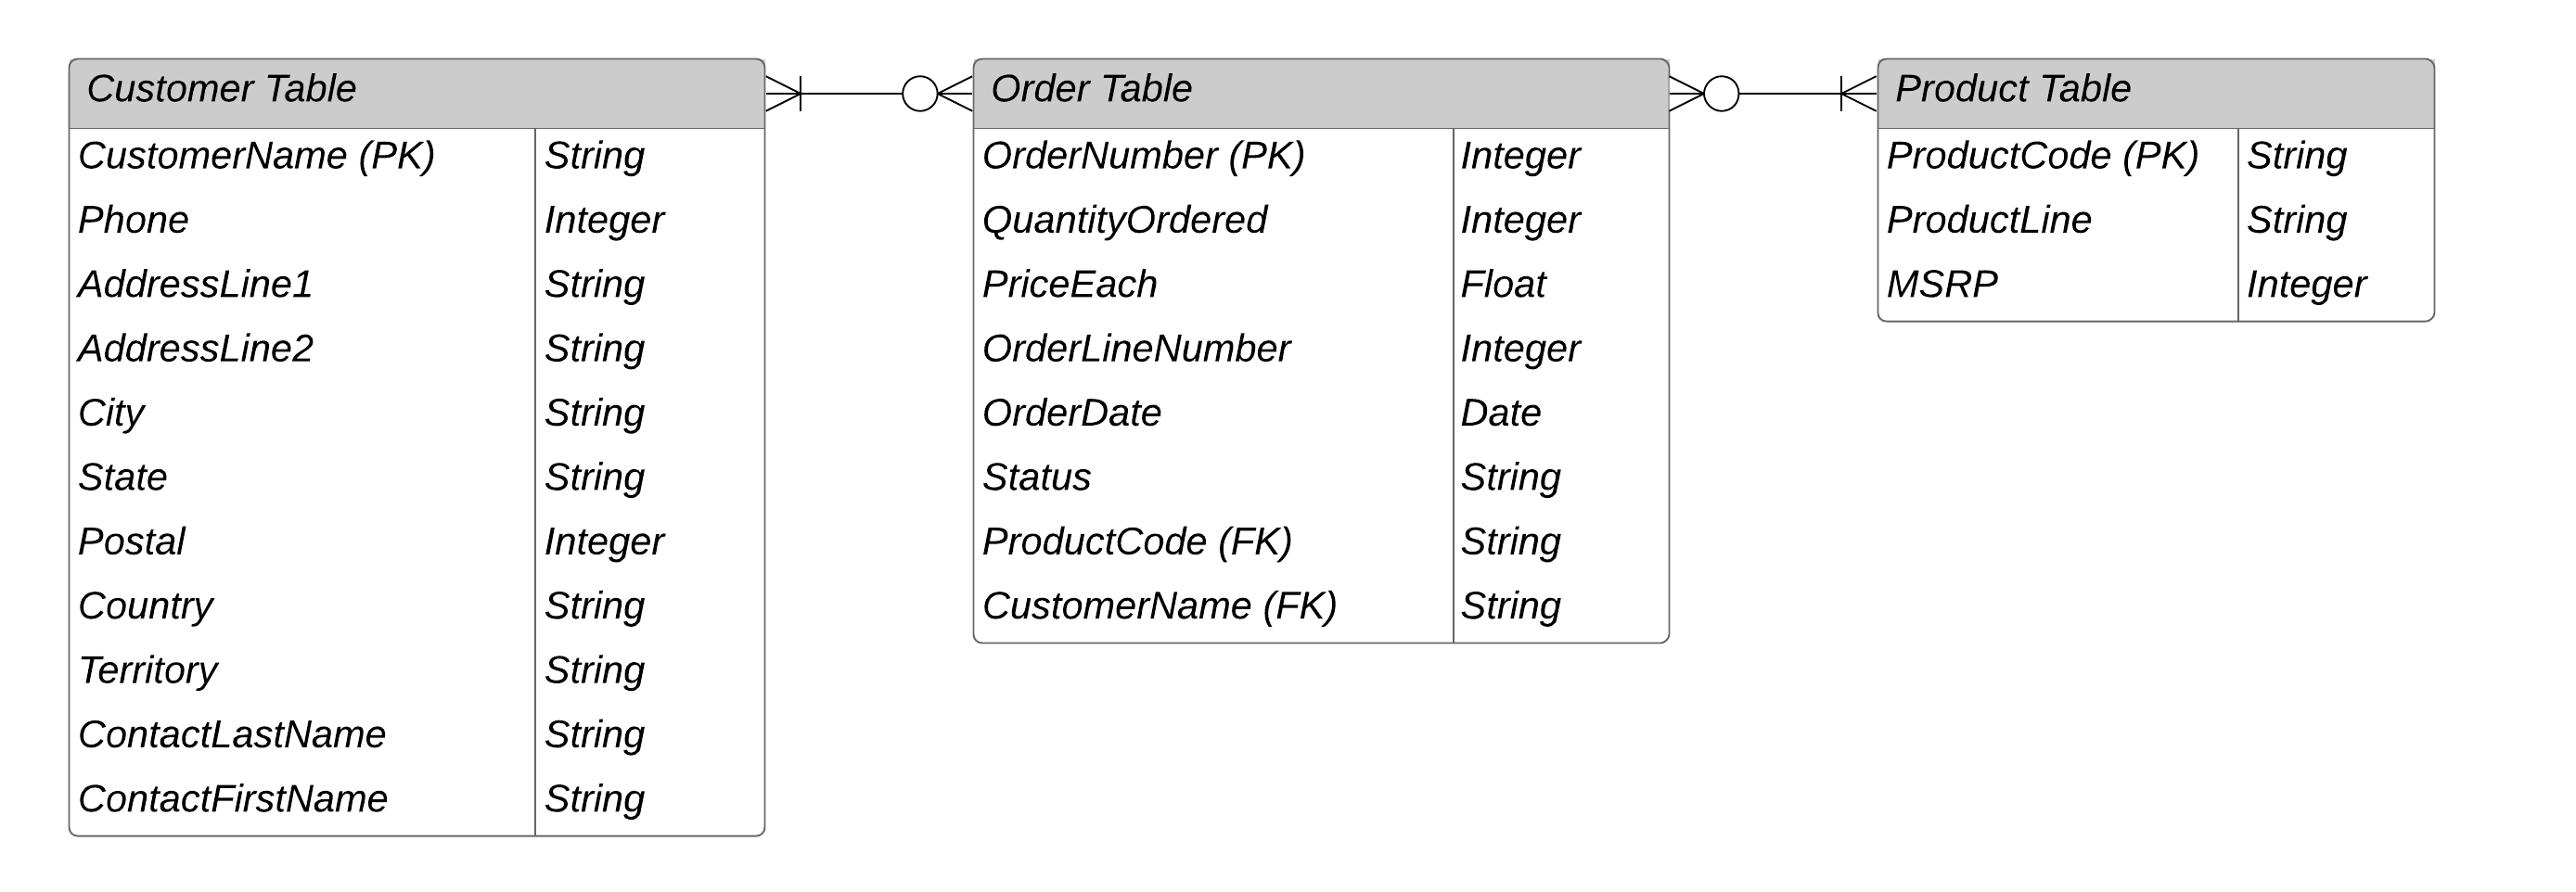

#### Creating Order table

Here the table is for order details which include the columns for 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE', 'STATUS', 'PRODUCTCODE' 'CUSTOMERNAME'.

Here the Primary Key is 'ORDERNUMBER' which is unique to all orders.
CUSTOMERNAME and PRODUCTCODE are the Foreign Keys in this table. These are representative for the other order relevant data which is redundant in the table.


In [3]:
order_table = data.drop(columns=['PRODUCTLINE', 'MSRP', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'DEALSIZE'])
order_table

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,PRODUCTCODE,CUSTOMERNAME
0,10107,30,95.70,2,2/24/2003 0:00,Shipped,S10_1678,Land of Toys Inc.
1,10121,34,81.35,5,5/7/2003 0:00,Shipped,S10_1678,Reims Collectables
2,10134,41,94.74,2,7/1/2003 0:00,Shipped,S10_1678,Lyon Souveniers
3,10145,45,83.26,6,8/25/2003 0:00,Shipped,S10_1678,Toys4GrownUps.com
4,10159,49,100.00,14,10/10/2003 0:00,Shipped,S10_1678,Corporate Gift Ideas Co.
...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,12/2/2004 0:00,Shipped,S72_3212,Euro Shopping Channel
2819,10373,29,100.00,1,1/31/2005 0:00,Shipped,S72_3212,"Oulu Toy Supplies, Inc."
2820,10386,43,100.00,4,3/1/2005 0:00,Resolved,S72_3212,Euro Shopping Channel
2821,10397,34,62.24,1,3/28/2005 0:00,Shipped,S72_3212,Alpha Cognac


In [4]:
# Removing duplicity within the table

order_table_final = order_table.drop_duplicates()
order_table_final

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,ORDERDATE,STATUS,PRODUCTCODE,CUSTOMERNAME
0,10107,30,95.70,2,2/24/2003 0:00,Shipped,S10_1678,Land of Toys Inc.
1,10121,34,81.35,5,5/7/2003 0:00,Shipped,S10_1678,Reims Collectables
2,10134,41,94.74,2,7/1/2003 0:00,Shipped,S10_1678,Lyon Souveniers
3,10145,45,83.26,6,8/25/2003 0:00,Shipped,S10_1678,Toys4GrownUps.com
4,10159,49,100.00,14,10/10/2003 0:00,Shipped,S10_1678,Corporate Gift Ideas Co.
...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,12/2/2004 0:00,Shipped,S72_3212,Euro Shopping Channel
2819,10373,29,100.00,1,1/31/2005 0:00,Shipped,S72_3212,"Oulu Toy Supplies, Inc."
2820,10386,43,100.00,4,3/1/2005 0:00,Resolved,S72_3212,Euro Shopping Channel
2821,10397,34,62.24,1,3/28/2005 0:00,Shipped,S72_3212,Alpha Cognac


In [5]:
#Auditing

order_table_final.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
ORDERDATE          0
STATUS             0
PRODUCTCODE        0
CUSTOMERNAME       0
dtype: int64

#### Creating Customer table

Here the table is for customer details which include the columns for 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'.

Here the Primary Key for the table is 'CUSTOMERNAME'.
No Foreign Key exists here.

In [6]:
customer_table = data.drop(columns=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTCODE', 'PRODUCTLINE', 'MSRP', 'DEALSIZE'])
customer_table

,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai
1,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul
2,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel
3,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie
4,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie
...,...,...,...,...,...,...,...,...,...,...,...
2818,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
2819,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko
2820,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
2821,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette


In [7]:
# Removing duplicity within the table

customer_table_final = customer_table.drop_duplicates()
customer_table_final

,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai
1,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul
2,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel
3,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie
4,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie
...,...,...,...,...,...,...,...,...,...,...,...
483,"Australian Collectables, Ltd",61-9-3844-6555,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean
554,Gift Ideas Corp.,2035554407,2440 Pompton St.,NaN,Glendale,CT,97561,USA,NaN,Lewis,Dan
567,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,NaN,Munich,NaN,80686,Germany,EMEA,Donnermeyer,Michael
571,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",NaN,Charleroi,NaN,B-6000,Belgium,EMEA,Cartrain,Pascale


In [8]:
#Auditing

customer_table_final.isnull().sum()

CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
ADDRESSLINE2        83
CITY                 0
STATE               46
POSTALCODE           3
COUNTRY              0
TERRITORY           38
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
dtype: int64

In [9]:
# Dropping columns as the data is biased and is empty but can lead to missing imformation

customer_table_final_edit = customer_table_final.drop(columns = ['ADDRESSLINE2', 'STATE', 'TERRITORY'])
customer_table_final_edit

,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai
1,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul
2,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel
3,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie
4,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie
...,...,...,...,...,...,...,...,...
483,"Australian Collectables, Ltd",61-9-3844-6555,7 Allen Street,Glen Waverly,3150,Australia,Connery,Sean
554,Gift Ideas Corp.,2035554407,2440 Pompton St.,Glendale,97561,USA,Lewis,Dan
567,"Bavarian Collectables Imports, Co.",+49 89 61 08 9555,Hansastr. 15,Munich,80686,Germany,Donnermeyer,Michael
571,Royale Belge,(071) 23 67 2555,"Boulevard Tirou, 255",Charleroi,B-6000,Belgium,Cartrain,Pascale


In [10]:
#Auditing 2

customer_table_final_edit.isnull().sum()

CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          3
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
dtype: int64

#### Creating Product table

Here the table is for product details which include the columns for 'PRODUCTCODE', 'PRODUCTLINE', 'MSRP'.

Here, 'PRODUCTCODE' acts as the table's Primary Key.
No Foreign Key is present or necessary in the table.

In [11]:
product_table = data.drop(columns=['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'])
product_table

,PRODUCTLINE,MSRP,PRODUCTCODE
0,Motorcycles,95,S10_1678
1,Motorcycles,95,S10_1678
2,Motorcycles,95,S10_1678
3,Motorcycles,95,S10_1678
4,Motorcycles,95,S10_1678
...,...,...,...
2818,Ships,54,S72_3212
2819,Ships,54,S72_3212
2820,Ships,54,S72_3212
2821,Ships,54,S72_3212


In [12]:
# Removing duplicity within the table

product_table_final = product_table.drop_duplicates()
product_table_final

,PRODUCTLINE,MSRP,PRODUCTCODE
0,Motorcycles,95,S10_1678
26,Classic Cars,214,S10_1949
54,Motorcycles,118,S10_2016
80,Motorcycles,193,S10_4698
106,Classic Cars,136,S10_4757
...,...,...,...
2691,Ships,100,S700_3505
2717,Ships,99,S700_3962
2743,Planes,74,S700_4002
2770,Planes,49,S72_1253


In [13]:
#Auditing

product_table_final.isnull().sum()

PRODUCTLINE    0
MSRP           0
PRODUCTCODE    0
dtype: int64

## Solutions

#### 1. What are the ranges, data types and format of all of the attributes in your entities?

#### 2. when should you use entity versus attribute?

To put the definition of an entity is an entity is a single person, place, or thing about which data can be stored. The entities may have relationship between the entities. The database stores all the values of entities and relationships.

Attribute is the characteristic property of an existing entity. The attribute has two parts in it namely the attribute instance and attribute type. Attribute type is the column name or field name that is in the above student entity student name is the attribute type and the actual value stored in it is the attribute instance. 

#### 3. When should you use an entity or relationship, and placement of attributes?

A data entity is anything real or abstract about which we want to store data. Entity types fall into five classes: roles, events, locations, tangible things or concepts. E.g. the employee John Jones, Mary Smith's payment, etc.

A data relationship is a natural association that exists between one or more entities. E.g. Employees process payments. Cardinality defines the number of occurrences of one entity for a single occurrence of the related entity. E.g. an employee may process many payments but might not process any payments depending on the nature of her job.

A data attribute is a characteristic common to all or most instances of a particular entity. Synonyms include property, data element, field. E.g. Name, address, Employee Number, pay rate are all attributes of the entity employee. An attribute or combination of attributes that uniquely identifies one and only one instance of an entity is called a primary key or identifier. E.g. Employee Number is a primary key for Employee.

#### 4. How did you choose your keys? Which are unique?

The basic requirement for keys to be chosen in dataset is to be unique to each data piece. No redundancy. The keys are chosen in accordance to the tables formulated where they can represent the collective data as for entities and it's attributes. They can be in from of Primary keys and represent in form of Foreign keys in another table.

Keys for the above sales dataset :

Order Table    -    ORDERNUMBER
Customer Table -    CUSTOMERNAME
Product Table  -    PRODUCTCODE


#### 5. Did you model hierarchies using the “ISA” design element? Why or why not?

The data values are in form of Instruction Set Architecture to support design of the table. The integers here mentioned are un-signed integers as there is no requirement for the values to go below 0. The memory address allocation would be less than 32-bit. And the given data set is compatible with stacks to load, store and modulate data.

#### 6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs. relationship, binary vs. ternary relationships?

The tablular data can further be reduced and atomised. This would in exchange increase the number of tables and form tables for relations, entities, and entity-attributes. 

*entity vs. attribute*
An entity is an object in RDBMS that is used to model and store information while an attribute is a characteristic to define an entity. Thus, this is the main difference between Entity and Attribute.
Furthermore, another difference between Entity and Attribute is that an entity represents the main objects of the RDBMS while attributes describe the entity.
Also, an entity is a row or a record in the table whereas an attribute is a column in the table.
RDBMS is one of the most widely used database management systems. However, it is necessary to design the database before developing it. Entity and attribute are related to ER diagrams. The main difference between Entity and Attribute is that Entity is a real-world object that represents data in RDBMS while Attribute is a property that describes an entity.

*entity vs. relationship*
An entity can be a real-world object, either animate or inanimate, that can be easily identifiable. A relationship is an association among entities.
A rectangle represents an entity in the ER diagram. A double rectangle represents a weak entity. A rhombus or diamond represents a relationship in an ER diagram. A double rhombus denotes a weak relationship.
The entities help to represent real-world objects. They are the tables. A relationship represents the association between entities.
An entity is a table in DBMS, and it represents a real-world object. Entities are connected to each other using relationships. Thus, the difference between entity and relationship in DBMS is that the entity is a real-world object while the relationship is an association between the entities.

*binary vs. ternrary relationships*
A binary relationship is between two entities and can be 1:1 (such as employee has a spouse) or 1:N (such as employee has dependents). A ternary relationship relates three entities (such as a prescription has a prescribing doctor but also has a patient -- patient, prescription, doctor are all entities).

#### 7. Where are you going to find real-world data to populate your model?

Sales/Retail database is required to obtain this real-world data for populating the tables represented above.


### Table Normalization Forms

The table previously contained columns " 'ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTCODE', 'PRODUCTLINE', 'MSRP', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE' ".

For 1st Normal Form, the table contained multiple values in 'PRODUCTCODE (FK)' so the contents have been divided upn this key's basis and normalized.

For 2nd Normal Form, the table contained valued like 'SALE', 'QTR_ID', 'MONTH_ID', 'YEAR_ID' which are calculated cells like 'SALE' is depended on the product of 'QUANTITYORDERED' and 'PRICEEACH'. 'QTR_ID', 'MONTH_ID', 'YEAR_ID' are values derived from 'ORDERDATE'. Those have been eliminated to bring the table in 2nd Normal Form.

For 3rd Normal Form, the table contained values like 'DEALSIZE' which is derived from the field 'SALES' which is a again a product result value of other fields 'QUANTITYORDERED' and 'PRICEEACH'. Therefore, making it a transitive dependency. By eliminating that, the table has been brought to 3rd Normal Form.

## Report

#### AUDIT VALIDITY/ACCURACY

The dataset above has been audited and has the least possible null values.

#### Assignemnt details

This assignemnt deals with creation of physical data model and it's normalization with the concept of 1st Normal, 2nd Normal and 3rd Normal forms.

The files used here are - 'sales_data_sample2.csv'

In this document, the file is read and all table details are extracted.
After extraction, the Conceptual Model is designed based on this table and an Entity Relationship Diagram is presented to follow the table data.
With regards to the conceptual model, other tables are created.
They are processed to be in their Normalized forms (1NF, 2NF and 3NF).
After this, the built table is audited for null-values.
If there is a large number of null-valued cells in this table, the columns are dropped in that accordance.
After the audit, the table is verified if that matches the created conceptual model.
This is repeated for all the tables to be created and data extracted from the originally obtained file.

*NF here indicates Normal Form

## Conclusion

The final desired table models have been achieved in this document and can further be modulated or employed.
The tables achieved are :

-> order_table_final

-> customer_table_final_edit

-> product_table_final

Therefore, here the above table are in 1NF, 2NF and 3NF. This fits into our desired table models mentioned in our Entity Relationship Diagram (ERD).

*NF here indicates Normal Form

## Contribution

Complete code is completely original.

## License

Copyright 2020 Shreyash Suratwala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.